# Citations by academic ages

In [ ]:
!pip install efficiency

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import json
import pandas as pd

In [ ]:
class Name2Gender:
    def __init__(self):
        self.full_name2gender = self._load_full_name_gender()
        self.first_name2gender = self._load_first_name_gender()

    def _load_first_name_gender(self):
        # 100711 lines
        from collections import defaultdict
        df = pd.read_csv("intermediate_data_for_preprocessing/gender_files/firstname_gender.csv")
        first_name_n_gender = df.to_dict(orient='records')
        first_name2gender = {dic['name']: dic['gender'] for dic in first_name_n_gender}
        return first_name2gender

    def _load_full_name_gender(self):
        def _file2full_name(file):
            from efficiency.log import fread
            full_names = fread(file, delete_empty=True, if_strip=True)
            # full_names = U.read_file(file)
            full_names = [' '.join(i.split(', ', 1)[::-1]).lower() for i in full_names]
            return full_names

        gender2file = {'M': 'intermediate_data_for_preprocessing/gender_files/acl-male.txt',
                       'F': 'intermediate_data_for_preprocessing/gender_files/acl-female.txt',
                       }
        full_name2gender = {}
        for gender, file in gender2file.items():
            full_names = _file2full_name(file)
            full_name2gender.update({i: gender for i in full_names})
        return full_name2gender

    def lookup_gender(self, full_name):
        gender = self.full_name2gender.get(full_name.lower(), '-')
        if gender == '-':
            first_name = full_name.rsplit(' ', 1)[0].lower()
            gender = self.first_name2gender.get(first_name, '-')
        return gender
gender_table = Name2Gender()

In [ ]:
with open("gs_scholar_new_features.jsonl") as f:
  scholars = [json.loads(line) for line in f if line.strip()]

In [ ]:
# check the number of female scholars and average scholars in 0-5 academic_age group
# with open("gs_scholars_wo_papers.jsonl") as f:
#   scholars = [json.loads(line) for line in f if line.strip()]

first_count = 0
second_count = 0
third_count = 0
forth_count = 0
fifth_count = 0
sixth_count = 0
seventh_count = 0
eighth_count = 0
for each in scholars:
  # if gender_table.lookup_gender(each['name']) == 'M':
  
    academic_age = each["academic_age"]
    if academic_age is None:
      continue
    # else:
    #   academic_age -= 1
    if academic_age > 0 and academic_age <= 5:
      first_count += 1
    elif academic_age > 5 and academic_age <= 10:
      second_count += 1
    elif academic_age > 10 and academic_age <= 15:
      third_count += 1 
    elif academic_age > 15 and academic_age <= 20:
      forth_count += 1
    elif academic_age > 20 and academic_age <= 25:
      fifth_count += 1
    elif academic_age > 25 and academic_age <= 30:
      sixth_count += 1
    elif academic_age > 30 and academic_age <= 35:
      seventh_count += 1
    else:
      eighth_count += 1

In [ ]:
fifth_count

5338

In [ ]:
list(scholars[0]["cit_sum_before_year"].items())[4][1]

[('1994', 39),
 ('1995', 86),
 ('1996', 187),
 ('1997', 287),
 ('1998', 383),
 ('1999', 500),
 ('2000', 615),
 ('2001', 727),
 ('2002', 833),
 ('2003', 951),
 ('2004', 1070),
 ('2005', 1203),
 ('2006', 1357),
 ('2007', 1543),
 ('2008', 1719),
 ('2009', 1866),
 ('2010', 2005),
 ('2011', 2129),
 ('2012', 2323),
 ('2013', 2487),
 ('2014', 2615),
 ('2015', 2758),
 ('2016', 2935),
 ('2017', 3051),
 ('2018', 3167),
 ('2019', 3261),
 ('2020', 3335),
 ('2021', 3411)]

In [ ]:
# check 0-5 year average citation of scholars in each academic_age group
# with open("gs_scholars_wo_papers.jsonl") as f:
#   scholars = [json.loads(line) for line in f if line.strip()]
rows = []
for each in scholars:
  if each['gender'] == 'F':
    first_citation = None
    second_citation = None
    third_citation = None
    forth_citation = None
    fifth_citation = None
    sixth_citation = None
    academic_age = each["academic_age"]
    if academic_age is None:
      continue
    else:
      academic_age -= 1
    if academic_age > 0 and academic_age <= 5:
      first_citation = list(each["cit_sum_before_year"].items())[-1][1]
    elif academic_age > 5 and academic_age <= 10:
      try:
        second_citation = list(each["cit_sum_before_year"].items())[4][1]
      except:
        continue
    elif academic_age > 10 and academic_age <= 15:
      try:
        third_citation = list(each["cit_sum_before_year"].items())[4][1]
      except:
        continue
    elif academic_age > 15 and academic_age <= 20:
      try:
        forth_citation = list(each["cit_sum_before_year"].items())[4][1]
      except:
        continue
    elif academic_age > 20 and academic_age <= 25:
      try:
        fifth_citation = list(each["cit_sum_before_year"].items())[4][1]
      except:
        continue
    else:
      try:
        sixth_citation = list(each["cit_sum_before_year"].items())[4][1]
      except:
        continue
    row = [first_citation, second_citation, third_citation, forth_citation, fifth_citation, sixth_citation]
    rows.append(row)
df = pd.DataFrame(rows, columns = ["first_citation", "second_citation", "third_citation", "forth_citation", "fifth_citation", "sixth_citation"])

In [ ]:
# check 6-10 year average citation of scholars in each academic_age group
# with open("gs_scholars_wo_papers.jsonl") as f:
#   scholars = [json.loads(line) for line in f if line.strip()]
rows = []
for each in scholars:
  if each['gender'] == 'F':
    second_citation = None
    third_citation = None
    forth_citation = None
    fifth_citation = None
    sixth_citation = None
    academic_age = each["academic_age"]
    if academic_age is None:
      continue
    else:
      academic_age -= 1
    if academic_age > 5 and academic_age <= 10:
      second_citation = list(each["cit_sum_before_year"].items())[-1][1]
    elif academic_age > 10 and academic_age <= 15:
      try:
        third_citation = list(each["cit_sum_before_year"].items())[9][1]
      except:
        continue
    elif academic_age > 15 and academic_age <= 20:
      try:
        forth_citation = list(each["cit_sum_before_year"].items())[9][1]
      except:
        continue
    elif academic_age > 20 and academic_age <= 25:
      try:
        fifth_citation = list(each["cit_sum_before_year"].items())[9][1]
      except:
        continue
    elif academic_age > 25:
      try:
        sixth_citation = list(each["cit_sum_before_year"].items())[9][1]
      except:
        continue
    row = [second_citation, third_citation, forth_citation, fifth_citation, sixth_citation]
    rows.append(row)
df = pd.DataFrame(rows, columns = ["second_citation", "third_citation", "forth_citation", "fifth_citation", "sixth_citation"])

In [ ]:
# check 11-15 year average citation of scholars in each academic_age group
# with open("gs_scholars_wo_papers.jsonl") as f:
#   scholars = [json.loads(line) for line in f if line.strip()]
rows = []
for each in scholars:
  if each['gender'] == 'F':
    second_citation = None
    third_citation = None
    forth_citation = None
    fifth_citation = None
    sixth_citation = None
    academic_age = each["academic_age"]
    if academic_age is None:
      continue
    else:
      academic_age -= 1
    if academic_age > 10 and academic_age <= 15:
      third_citation = list(each["cit_sum_before_year"].items())[-1][1]
    elif academic_age > 15 and academic_age <= 20:
      try:
        forth_citation = list(each["cit_sum_before_year"].items())[14][1]
      except:
        continue
    elif academic_age > 20 and academic_age <= 25:
      try:
        fifth_citation = list(each["cit_sum_before_year"].items())[14][1]
      except:
        continue
    elif academic_age > 25:
      try:
        sixth_citation = list(each["cit_sum_before_year"].items())[14][1]
      except:
        continue
    row = [second_citation, third_citation, forth_citation, fifth_citation, sixth_citation]
    rows.append(row)
df = pd.DataFrame(rows, columns = ["second_citation", "third_citation", "forth_citation", "fifth_citation", "sixth_citation"])

In [ ]:
# check 16-20 year average citation of scholars in each academic_age group
# with open("gs_scholars_wo_papers.jsonl") as f:
#   scholars = [json.loads(line) for line in f if line.strip()]
rows = []
for each in scholars:
  # if each['gender'] == 'F':
    second_citation = None
    third_citation = None
    forth_citation = None
    fifth_citation = None
    sixth_citation = None
    academic_age = each["academic_age"]
    if academic_age is None:
      continue
    else:
      academic_age -= 1
    if academic_age > 15 and academic_age <= 20:
      try:
        forth_citation = list(each["cit_sum_before_year"].items())[-1][1]
      except:
        continue
    elif academic_age > 20 and academic_age <= 25:
      try:
        fifth_citation = list(each["cit_sum_before_year"].items())[19][1]
      except:
        continue
    elif academic_age > 25:
      try:
        sixth_citation = list(each["cit_sum_before_year"].items())[19][1]
      except:
        continue
    row = [second_citation, third_citation, forth_citation, fifth_citation, sixth_citation]
    rows.append(row)
df = pd.DataFrame(rows, columns = ["second_citation", "third_citation", "forth_citation", "fifth_citation", "sixth_citation"])

In [ ]:
df["sixth_citation"].median()

1961.0

In [ ]:
# check 21-25 year average citation of scholars in each academic_age group
# with open("gs_scholars_wo_papers.jsonl") as f:
#   scholars = [json.loads(line) for line in f if line.strip()]
rows = []
for each in scholars:
  if each['gender'] == 'F':
    second_citation = None
    third_citation = None
    forth_citation = None
    fifth_citation = None
    sixth_citation = None
    academic_age = each["academic_age"]
    if academic_age is None:
      continue
    else:
      academic_age -= 1
    if academic_age > 20 and academic_age <= 25:
      try:
        fifth_citation = list(each["cit_sum_before_year"].items())[-1][1]
      except:
        continue
    elif academic_age > 25:
      try:
        sixth_citation = list(each["cit_sum_before_year"].items())[24][1]
      except:
        continue
    row = [second_citation, third_citation, forth_citation, fifth_citation, sixth_citation]
    rows.append(row)
df = pd.DataFrame(rows, columns = ["second_citation", "third_citation", "forth_citation", "fifth_citation", "sixth_citation"])

In [ ]:
# check 21-25 year average citation of scholars in each academic_age group
# with open("gs_scholars_wo_papers.jsonl") as f:
#   scholars = [json.loads(line) for line in f if line.strip()]
rows = []
for each in scholars:
  if each['gender'] == 'F':
    second_citation = None
    third_citation = None
    forth_citation = None
    fifth_citation = None
    sixth_citation = None
    academic_age = each["academic_age"]
    if academic_age is None:
      continue
    else:
      academic_age -= 1
    if academic_age > 25:
      try:
        sixth_citation = list(each["cit_sum_before_year"].items())[-1][1]
      except:
        continue
    row = [second_citation, third_citation, forth_citation, fifth_citation, sixth_citation]
    rows.append(row)
df = pd.DataFrame(rows, columns = ["second_citation", "third_citation", "forth_citation", "fifth_citation", "sixth_citation"])

In [ ]:
# check 0-5 year average citation of scholars in each academic_age group
# with open("gs_scholars_wo_papers.jsonl") as f:
#   scholars = [json.loads(line) for line in f if line.strip()]
rows = []
first_citation = []
second_citation = []
third_citation = []
forth_citation = []
fifth_citation = []
sixth_citation = []
for each in scholars:
  if each['gender'] == 'M':
    
    academic_age = each["academic_age"]
    if academic_age is None:
      continue
    else:
      academic_age -= 1
    if academic_age > 0 and academic_age <= 5:
      first_citation.append(int(each["citation_table"][0]))
    elif academic_age > 5 and academic_age <= 10:
      try:
        second_citation.append(int(each["citation_table"][0]))
      except:
        continue
    elif academic_age > 10 and academic_age <= 15:
      try:
        third_citation.append(int(each["citation_table"][0]))
      except:
        continue
    elif academic_age > 15 and academic_age <= 20:
      try:
        forth_citation.append(int(each["citation_table"][0]))
      except:
        continue
    elif academic_age > 20 and academic_age <= 25:
      try:
        fifth_citation.append(int(each["citation_table"][0]))
      except:
        continue
    else:
      try:
        sixth_citation.append(int(each["citation_table"][0]))
      except:
        continue
import numpy as np
print(np.mean(forth_citation))
print(np.std(forth_citation))

2316.870407239819
7897.539782212053


In [ ]:
citation = []
female_citation = []
male_citation = []
for each in scholars:
  citation.append(int(each["citation_table"][0]))
  if each['gender'] == 'M':
    male_citation.append(int(each["citation_table"][0]))
  elif each['gender'] == 'F':
    female_citation.append(int(each["citation_table"][0]))

print(np.mean(citation))
print(np.std(citation))
print(np.mean(female_citation))
print(np.std(female_citation))
print(np.mean(male_citation))
print(np.std(male_citation))



2122.8006046166065
8626.445669385952
1757.0865548607162
6236.9122592972
2694.154767101079
10921.733696771114


In [ ]:
print(np.mean(first_citation))
print(np.std(first_citation))

print(np.mean(second_citation))
print(np.std(second_citation))

print(np.mean(third_citation))
print(np.std(third_citation))

print(np.mean(forth_citation))
print(np.std(forth_citation))

print(np.mean(fifth_citation))
print(np.std(fifth_citation))

print(np.mean(sixth_citation))
print(np.std(sixth_citation))

385.568718381113
984.2606867132907
736.1509821543202
2651.43768350376
1398.304125
6042.526783629757
2316.870407239819
7897.539782212053
3801.129324823648
9051.563446688586
8218.147504621073
22185.58639330593


In [ ]:
df["first_citation"].describe()

count     9691.000000
mean       443.899701
std        998.655018
min         67.000000
25%        135.000000
50%        217.000000
75%        408.000000
max      34378.000000
Name: first_citation, dtype: float64

In [ ]:
df["second_citation"].describe()

count    25002.000000
mean       828.326014
std       2133.228325
min         84.000000
25%        176.000000
50%        325.000000
75%        687.000000
max      81757.000000
Name: second_citation, dtype: float64

In [ ]:
df["third_citation"].describe()

count     18886.000000
mean       1331.211744
std        2933.263092
min          92.000000
25%         256.250000
50%         527.000000
75%        1173.000000
max      103948.000000
Name: third_citation, dtype: float64

In [ ]:
df["forth_citation"].describe()

count     10495.000000
mean       2455.070605
std        5754.977195
min          98.000000
25%         409.000000
50%         951.000000
75%        2551.500000
max      302234.000000
Name: forth_citation, dtype: float64

In [ ]:
df["fifth_citation"].describe()

count      4541.000000
mean       3916.956397
std        7215.095215
min          99.000000
25%         623.000000
50%        1721.000000
75%        4219.000000
max      159072.000000
Name: fifth_citation, dtype: float64

In [ ]:
df["sixth_citation"].describe()

count      3822.000000
mean       5643.550497
std       10942.988238
min          67.000000
25%         807.000000
50%        2423.000000
75%        6180.250000
max      257588.000000
Name: sixth_citation, dtype: float64

In [ ]:
# with open("gs_scholars_wo_papers.jsonl") as f:
#   scholars = [json.loads(line) for line in f if line.strip()]
citations = []
female_citations = []
for each in scholars:
  
  citation = []
  for year,value in each["cit_sum_before_year"].items():
    citation.append(value)
  if gender_table.lookup_gender(each['name']) == 'F':
    female_citations.append(citation)
  citations.append(citation)

In [ ]:
with open("gs_scholar_new_features.jsonl") as f:
  scholars = [json.loads(line) for line in f if line.strip()]

In [ ]:
citations = []
female_citations = []
for each in scholars:
  citation = []
  for year,value in each["cit_sum_before_year"].items():
    citation.append(value)
  if each['gender'] == 'F':
    female_citations.append(citation)
  citations.append(citation)

In [ ]:
import numpy as np
maxLength = max(len(x) for x in citations)
maxLength = 39
average_citation_by_aa = []
for i in range(maxLength):
  total = []
  for each in citations:
    try:
      total.append(each[i])
    except:
      continue
  average = np.sum(total) / len(total)
  average_citation_by_aa.append(average)

In [ ]:
import numpy as np
maxLength = max(len(x) for x in female_citations)
print(maxLength)
average_citation_by_aa_f = []
for i in range(maxLength):
  total = []
  for each in female_citations:
    try:
      total.append(each[i])
    except:
      continue
  average = np.sum(total) / len(total)
  average_citation_by_aa_f.append(average)

39


In [ ]:
num = 0
res = []
for each in average_citation_by_aa_f:
  res.append((num, each))
  num += 1
res

[(0, 11.577885162023877),
 (1, 42.30405117270789),
 (2, 97.3292805035045),
 (3, 174.03838855641513),
 (4, 269.4008891614288),
 (5, 375.68139993427536),
 (6, 483.82287756925825),
 (7, 589.7034632034632),
 (8, 718.3267716535433),
 (9, 894.008572128337),
 (10, 1068.10183639399),
 (11, 1272.2636450686243),
 (12, 1402.9295154185022),
 (13, 1640.8164291701592),
 (14, 1930.070243902439),
 (15, 2105.8856819468024),
 (16, 2365.0532623169106),
 (17, 2658.8170347003156),
 (18, 2954.4555659494854),
 (19, 3065.4161915621435),
 (20, 3432.6698895027625),
 (21, 3643.745542949757),
 (22, 3853.45179584121),
 (23, 4176.178970917226),
 (24, 4127.341463414634),
 (25, 4317.765079365079),
 (26, 4407.748148148148),
 (27, 4698.886255924171),
 (28, 4731.412121212121),
 (29, 5359.4),
 (30, 5366.5),
 (31, 4658.202531645569),
 (32, 5362.65625),
 (33, 5883.320754716981),
 (34, 6465.8536585365855),
 (35, 6334.636363636364),
 (36, 6783.96),
 (37, 7054.391304347826),
 (38, 6653.222222222223)]

Citations by academic age of female scholars and total scholars

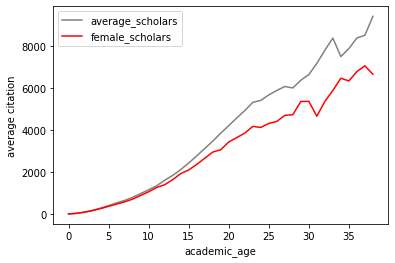

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
y = list(range(0,39,1))
plt.plot(y, average_citation_by_aa, color='gray', label="average_scholars")
plt.plot(y, average_citation_by_aa_f, color='red', label = "female_scholars")
plt.xlabel("academic_age")
plt.ylabel("average citation")
plt.legend()
fig.savefig('coauthorship_distribution.pdf', dpi=600, bbox_inches='tight')

# Dropout rate analysis

In [ ]:
import json
with open("gs_scholar_new_features.jsonl") as f:
  scholars = [json.loads(line) for line in f if line.strip()]

In [ ]:
import pandas as pd
scholar_df = pd.DataFrame(scholars)
scholar_df

,gs_sid,organization,organization_code,academic,gender,academic_lifespan,academic_age,cit_sum_before_year,citation_table,domain_labels,paper_num
0,IIrX5SMAAAAJ,N/A,None,False,F,28.0,31.0,"{'1994': 39, '1995': 86, '1996': 187, '1997': ...","[3539, 27]","[logic_programming, machine_learning, natural_...",151
1,9gVmuMAAAAAJ,"Software Engineering Manager, Apple Inc.",11540454294127154050,False,-,24.0,27.0,"{'1996': 10, '1997': 58, '1998': 203, '1999': ...","[3502, 30]","[natural_language_processing, data_management,...",118
2,EmTFUdQAAAAJ,"Professor, University of Chinese Academy of Sc...",16853398057353869326,True,M,19.0,20.0,"{'2004': 15, '2005': 64, '2006': 146, '2007': ...","[3441, 29]","[natural_language_processing, information_retr...",93
3,zBPIt3QAAAAJ,Assistant researcher of Institute of Automatio...,2751420617708739826,True,-,10.0,10.0,"{'2014': 14, '2015': 45, '2016': 172, '2017': ...","[3648, 23]","[question_answering, dialogue_system, natural_...",62
4,vM9772wAAAAJ,Professor - JAIST,4208498446222246415,True,-,21.0,21.0,"{'2006': 10, '2007': 53, '2008': 104, '2009': ...","[3473, 25]","[natural_language_processing, machine_learning...",300
...,...,...,...,...,...,...,...,...,...,...,...
72968,MW7s_mkAAAAJ,"Researcher & Instructor, R&D, New Delhi, India",None,False,M,20.0,21.0,"{'2009': 1, '2010': 7, '2011': 12, '2012': 22,...","[137, 6]","[machine_learning, data_mining, predictive_ana...",21
72969,l4qWbBYAAAAJ,Unknown affiliation,None,False,M,2.0,6.0,"{'2018': 43, '2019': 137, '2020': 233, '2021':...","[367, 4]",[computer_vision],5
72970,m-nZ7MgAAAAJ,Rutgers University,3903766639137847059,True,M,13.0,13.0,"{'2012': 11, '2013': 22, '2014': 39, '2015': 5...","[1040, 18]","[optimization, machine_learning, applied_linea...",77
72971,omYX1FkAAAAJ,AU-KBC Research Centre,None,False,-,23.0,24.0,"{'2006': 6, '2007': 18, '2008': 27, '2009': 43...","[742, 17]","[anaphora_resolution, discourses_analysis, syn...",113


In [ ]:
scholar_df["academic_age"].describe()

count    78269.000000
mean        16.647715
std          9.923757
min          2.000000
25%         10.000000
50%         14.000000
75%         20.000000
max         53.000000
Name: academic_age, dtype: float64

In [ ]:
temp = scholar_df[scholar_df["academic_age"] < 5]
temp

,gs_sid,organization,organization_code,academic,gender,academic_lifespan,academic_age,cit_sum_before_year,domain_labels,paper_num
19,CXlp-fcAAAAJ,Microsoft Turing,None,False,-,4.0,4.0,"{'2018': 7, '2019': 96, '2020': 695, '2021': 2...","[neural_machine_translation, natural_language_...",33
63,cPtgl3wAAAAJ,"Research Scientist, Facebook Reality Labs",None,False,-,3.0,4.0,"{'2019': 34, '2020': 222, '2021': 637, '2022':...","[dialogue_system, natural_language_processing,...",38
93,cUSS3fYAAAAJ,University of Washington,5340226318625937772,True,F,3.0,4.0,"{'2018': 3, '2019': 27, '2020': 164, '2021': 4...","[machine_learning, natural_language_processing]",7
142,ZfehPhAAAAAJ,Tsinghua University,15442380624744264287,True,-,3.0,3.0,"{'2019': 170, '2020': 695, '2021': 1624, '2022...","[natural_language_processing, artificial_intel...",8
171,_d5MbfoAAAAJ,Facebook AI Research,None,False,M,4.0,4.0,"{'2019': 25, '2020': 489, '2021': 1688, '2022'...","[natural_language_processing, deep_learning]",13
...,...,...,...,...,...,...,...,...,...,...
72781,oKqr-ZQAAAAJ,Tsinghua University,15442380624744264287,True,M,3.0,4.0,"{'2019': 17, '2020': 96, '2021': 260, '2022': ...","[computer_vision, robotics]",12
72782,3KF3AIMAAAAJ,UC San Diego,7549334305653538480,False,-,4.0,4.0,"{'2019': 2, '2020': 38, '2021': 146, '2022': 198}","[robot_learning, reinforcement_learning, compu...",15
72856,j2P1c6sAAAAJ,Google,None,False,M,3.0,3.0,"{'2019': 2, '2020': 151, '2021': 385, '2022': ...","[machine_learning, statistics]",6
72869,TshGE5cAAAAJ,Air University,None,True,M,3.0,4.0,"{'2019': 7, '2020': 53, '2021': 165, '2022': 189}","[computer_vision, image_processing, machine_le...",8


In [ ]:
female_df = scholar_df[scholar_df["gender"] == 'F']
len(female_df)
total_female = len(female_df)

6668

In [ ]:
import numpy as np
current_academic_lifespan = []
drop_out = 0
total = 0
industry = 0
for index, row in scholar_df.iterrows():
  if row["academic_age"] > 35 and row["academic_age"] <= 40 and row["gender"] == 'M':
    current_academic_lifespan.append(row["academic_age"] - row["academic_lifespan"])
    total += 1
    if row["academic_age"] - row["academic_lifespan"] >= 5:
      drop_out += 1
      if not row["academic"]:
        industry += 1
    # if not row["academic"]:
    #   industry += 1
    #   if row["academic_age"] - row["academic_lifespan"] >= 5:
    #     drop_out += 1
    #     current_academic_lifespan.append(row["academic_age"] - row["academic_lifespan"])
# print(len(current_academic_lifespan))
print(np.nanmean(current_academic_lifespan))
print(drop_out / industry)
print(industry / total)
print(industry / drop_out)

1.7440699126092385
1.8444444444444446
0.056179775280898875
0.5421686746987951


In [ ]:
import numpy as np
current_academic_lifespan = []
drop_out = 0
total = 0
industry = 0
for index, row in scholar_df.iterrows():
  if row["academic_age"] - row["academic_lifespan"] < 5:
    drop_out += 1
    if not row["academic"]:
      industry += 1

print(industry)

25484
